# Clasificación binaria con scikit-learn

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Análisis del dataset Iris

```scikit-learn``` incorpora unos [datasets de ejemplo](https://scikit-learn.org/stable/datasets/toy_dataset.html) que podemos utilizar para probar nuestros modelos. En este caso vamos a utilizar el dataset de flores [Iris](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py). Este dataset contiene 150 muestras de 3 especies diferentes de flores del [género Iris](https://es.wikipedia.org/wiki/Iris_(planta)) (50 muestras por especie) clasificadas. Para cada muestra se han tomado las medidas de longitud y anchura del sépalo y del pétalo. Tenemos por tanto 4 **características o *features*** (longitud y anchura del sépalo y del pétalo) y la clase (especie de la flor).


In [120]:
from sklearn.datasets import load_iris
iris = load_iris()


Estos datasets son objetos de tipo ```Bunch``` que contienen los datos y la información de las variables.
Podemos ver la descripción del dataset con el atributo ```DESCR``` y los nombres de las *features* con el atributo ```feature_names```.

In [121]:
print(type(iris)) # Tipo de objeto

<class 'sklearn.utils._bunch.Bunch'>


In [122]:
print(iris.DESCR) # Información del dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

El atributo ```iris.target``` contiene las **etiquetas de las muestras**. En este caso son números enteros que representan las clases de las flores (0, 1 o 2). Para saber qué clase representa cada número podemos consultar el atributo ```target_names```.

In [123]:
print(type(iris.target)) # Clases de las flores
print(iris.target_names) # Nombre de las clases
iris.target # Clases de las flores

<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Por tanto, tenemos etiquetada cada muestra con la clase a la que pertenece (0 para setosa, 1 para versicolor y 2 para virginica).

El atributo ```data``` contiene los **datos de las muestras**. Cada muestra es un array de 4 elementos que representan las medidas de longitud y anchura del sépalo y del pétalo. Podemos saber qué *feature* representan cada elemento del array consultando el atributo ```feature_names```.

In [124]:
print(iris.feature_names) # Datos de las flores
iris.data[:5,:] # Datos de las flores (5 primeras filas)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Recapitulando:
- ```iris.data``` es ndarray bidimensional, donde cada fila contiene la 4 features de cada muestra en un vector de 4 elementos. Estos elementos son respectivamente la longitud del sépalo, la anchura del sépalo, la longitud del pétalo y la anchura del pétalo, todo ello en centímetros, según nos indica el atributo ```feature_names```.
- ```iris.target``` es un array unidimensional que contiene la clase de cada muestra. Cada clase es un número entero que representa una especie de flor: 0 para setosa, 1 para versicolor y 2 para virginica, según nos indica el atributo ```target_names```.

Sabiendo esto podemos, por ejemplo, mostrar cómo se [clasifican los datos según la longitud y anchura del sépalo](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#scatter-plot-of-the-iris-dataset):

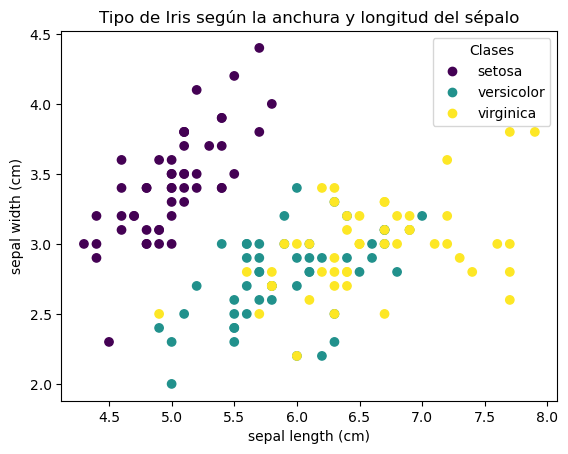

In [125]:
scatter = plt.scatter(
    iris.data[:, 0],   # Longitud del sépalo en el eje X (array de elementos de la columna 0)
    iris.data[:, 1],   # Ancho del sépalo en el eje Y
    c=iris.target)     # Color en función de las clases de las flores

plt.xlabel(iris.feature_names[0])   # Nombre del eje X
plt.ylabel(iris.feature_names[1])   # Nombre del eje Y
plt.legend(scatter.legend_elements()[0], iris.target_names, title="Clases")
plt.title("Tipo de Iris según la anchura y longitud del sépalo")
plt.show()

## Regresión logística de una única variable

### Preparación de los datos

Vamos a crear un modelo para clasificar si una flor es de tipo virgínica (```iris.target == 2```) o no lo es (**clasificación binaria**) en función de la longitud del pétalo (columna 2 de ```iris.data```). Para ello vamos a utilizar una **regresión logística**.

In [126]:
X = iris.data[:, 2:3] # Columna con los anchos del pétalo

```iris.target``` es un array unidimensional que contiene la clase de cada muestra. Como solo queremos diferenciar entre Virgínica y otras, comprobamos si ```iris.target == 2``` de modo que tenemos ```True``` para las muestras de Virginica y ```False``` para las muestras de Setosa o Versicolor. Para poder procesar estos valores booleanos como una probabilidad, los convertimos a ```int``` con ```astype(int)```, de modo que los valores ```True``` se convierten en ```1``` y los valores ```False``` se convierten en ```0```.

In [127]:
y = (iris.target == 2).astype(int) # 1 si Iris-Virginica, 0 si no lo es
# También se podría hacer de modo funcional:
y = np.array(list(map(lambda x: 1 if x == 2 else 0, iris.target)))

### Creación del modelo y predicción

Creamos un modelo de regresión logística con ```LogisticRegression()``` y lo entrenamos con los datos de longitud del sépalo y la etiqueta de cada muestra. Para ello, utilizamos el método ```fit()``` del modelo, que recibe como parámetros los datos de las muestras y las etiquetas de las muestras.

In [128]:
log_reg = LogisticRegression().fit(X, y)

Calculamos la predicción y probabilidad para el nuevo valor de 5 cm de longitud del pétalo.

In [129]:
new_petal_width = 5 # Anchura del pétalo de una nueva flor (5 cm)
new_proba = log_reg.predict_proba([[new_petal_width]])[:,1]
new_prediction = log_reg.predict([[new_petal_width]])
new_proba

array([0.60899848])

### Representación gráfica

Creamos un array de valores de longitud del pétalo y predecimos la probabilidad de que cada muestra sea de tipo virgínica con el método `predict_proba()` para representar la curva de regresión logística.

In [130]:
x_sigmoide = np.linspace(1, 7, 100).reshape(-1, 1) 
y_sigmoide = log_reg.predict_proba(x_sigmoide) # Distribución de probabilidad

Representamos gráficamente la curva de regresión logística y la predicción de probabilidad para el nuevo valor de longitud del pétalo.

/tmp/ipykernel_10520/284940452.py:8: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(round(new_proba[0],3)*100, (new_petal_width, new_proba), textcoords="offset points")


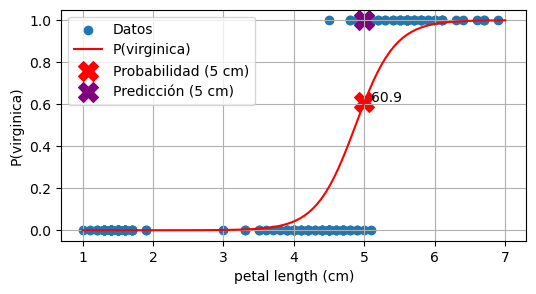

In [131]:
plt.figure(figsize=(6, 3))
plt.scatter(X, y, label="Datos")
plt.plot(x_sigmoide, y_sigmoide[:, 1], 'r-', label=f"P({iris.target_names[2]})") # Probabilidad de acceso

plt.scatter(new_petal_width, new_proba, color='red', marker='X', s=200, label="Probabilidad (5 cm)")
plt.scatter(new_petal_width, new_prediction, color='purple', marker='X', s=200, label="Predicción (5 cm)")

plt.annotate(round(new_proba[0],3)*100, (new_petal_width, new_proba), textcoords="offset points")

plt.xlabel(iris.feature_names[2])
plt.ylabel(f"P({iris.target_names[2]})")
plt.legend()

plt.grid(True)
plt.show()